In [6]:
import autorootcwd
import os
import json
import pandas as pd

In [ ]:
DIR = 'results/hop_lengths'
experiments = os.listdir(DIR)

rows = []
errored = []

for experiment in experiments:
    # Format of filename is lr-search_scheduler_lr
    hop_length = int(experiment.split('_')[2])
    try:
        with open(f'{DIR}/{experiment}/val_metrics.json') as f:
            data = json.load(f)
        rows.append({
            'hop_length': hop_length,
            'accuracy': data['mean']['song_wise_acc'],
            'root': data['mean']['root'],
            'majmin': data['mean']['majmin'],
            'third': data['mean']['third'],
            'seventh': data['mean']['seventh'],
            'mirex': data['mean']['mirex'],
            'class_wise_acc_mean': data['class_wise_acc_mean'],
            'class_wise_acc_median': data['class_wise_acc_median'],
        })
    except:
        errored.append(experiment)

df = pd.DataFrame(rows)

In [12]:
df.sort_values('hop_length', ascending=True, inplace=True)
df

,hop_length,accuracy,root,majmin,third,seventh,mirex,class_wise_acc_mean,class_wise_acc_median
1,1024,0.595325,0.781060,0.752802,0.745483,0.617698,0.792313,0.193836,0.021484
3,2048,0.590625,0.778756,0.750582,0.743372,0.612871,0.791404,0.176847,0.000000
0,4096,0.593483,0.783439,0.751754,0.745394,0.615718,0.791787,0.180654,0.005402
4,8192,0.559478,0.749674,0.712638,0.706321,0.580633,0.807861,0.173526,0.009317
2,16384,0.551547,0.740399,0.705044,0.697979,0.571941,0.774712,0.152071,0.000000


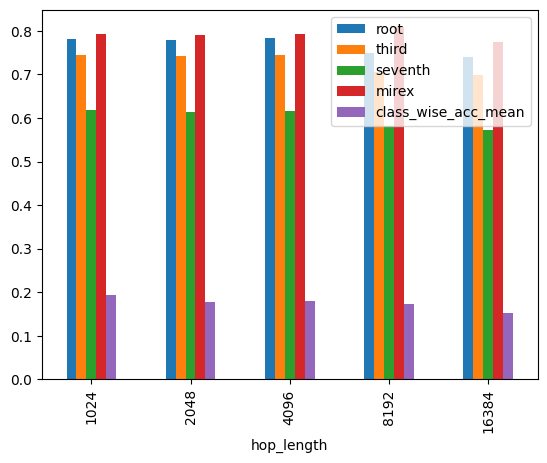

In [17]:
# Plot hop length vs root, third, seventh, mirex and class_wice_acc_mean on the same plot as a bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x='hop_length', y=['root', 'third', 'seventh', 'mirex', 'class_wise_acc_mean'], kind='bar', ax=ax)

plt.show()

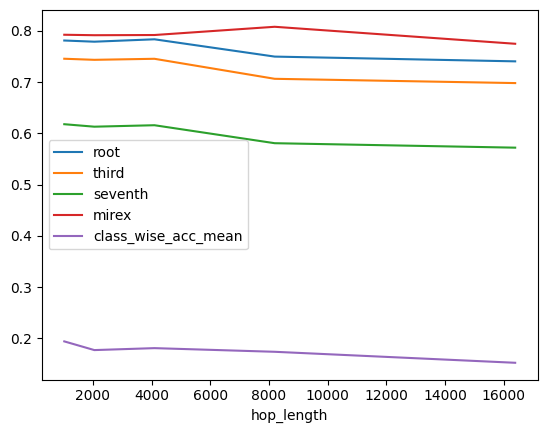

In [18]:
# Plot hop length vs root, third, seventh, mirex and class_wice_acc_mean on the same plot as a line chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x='hop_length', y=['root', 'third', 'seventh', 'mirex', 'class_wise_acc_mean'], kind='line', ax=ax)

plt.show()